# UFC Case Study Notebook

## LMM data computing suggestions

1. 🎯 Relatórios descritivos (exploratórios)
    Esses ajudam a entender o “panorama geral” do UFC e são ótimos para portfólio ou apresentação:

* 📈 Panorama histórico do UFC
    * Evolução no número de lutas por ano
    * Países/cidades com mais eventos
    * Quantidade de lutas por categoria de peso ao longo do tempo
<br/>

* 🥊 Estatísticas gerais de luta
    * Proporção de vitórias por nocaute, finalização, decisão
    * Duração média das lutas por categoria
    * Tipos de finalização mais comuns
    * Médias de golpes por minuto (ou por round)

🧍‍♂️ Análise de atletas
Top 10 atletas com mais vitórias

Atletas com maior taxa de nocaute

Comparativo de desempenho por idade

Tempo médio de carreira dos lutadores

🧠 2. Relatórios analíticos e comparativos
Mais profundidade, bons pra mostrar teu domínio de análise:

📊 Fatores que influenciam o resultado
Existe correlação entre altura/envergadura e chance de vitória?

Lutadores que batem o peso têm maior chance de ganhar?

Lutadores que vêm de vitória têm maior probabilidade de ganhar a próxima?

🤼‍♂️ Análise de rivalidades ou trilogias
Evolução dos confrontos entre lutadores que se enfrentaram mais de uma vez (ex: McGregor x Poirier)

Quem melhora na revanche?

🤖 3. Modelos preditivos (avançado)
Se quiser subir o nível e usar Machine Learning:

🧪 Previsão de resultado da luta
Dado o perfil dos lutadores (idade, altura, envergadura, cartel, última luta etc.), prever o provável vencedor

Classificação binária (vitória A ou B)

Algoritmos: Random Forest, XGBoost, Logistic Regression

📌 Clusterização de estilos de lutadores
Agrupar lutadores por estilo com base em estatísticas de luta

Ex: "striker agressivo", "grappler técnico", "controlador de tempo"

🧰 Ferramentas para relatório final
Relatório	Ferramenta sugerida
PDF com gráficos estáticos	Jupyter Notebook + matplotlib/seaborn + nbconvert
Dashboard interativo	Streamlit, Plotly Dash, ou Power BI
Relatório executivo para cliente	Canva, Google Slides, ou PDF bonitão via LaTeX

💡 Exemplo de relatório para portfólio:
🎓 Título: "20 anos de UFC em números: como o MMA evoluiu entre 1994 e 2025"
Seções:

Introdução ao dataset

Evolução histórica

Análise de vitórias e categorias

Perfil dos campeões

Análise por país (top lutadores do Brasil, EUA, Rússia, etc.)

Mini-modelo preditivo: o que influencia uma vitória?

Conclusões e insights estratégicos



## Importing libraries

In [33]:
#from collections import Counter
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub

## Util functions

In [34]:
def human_readable_date(date):
    # usage example d = human_readable_date(datetime.today())
    if isinstance(date, str):
        date = datetime.strptime(date, "%Y-%m-%d")  # ou "%d/%m/%Y" se for BR

    day = date.day
    year = date.year
    month = date.strftime("%B")

    # Sufixos: st, nd, rd, th
    if 11 <= day <= 13:
        suffix = "th"
    else:
        last_digit = day % 10
        suffix = {1: "st", 2: "nd", 3: "rd"}.get(last_digit, "th")

    return f"{month} {day}{suffix}, {year}"

## Raw data fetch

In [35]:
path = kagglehub.dataset_download("neelagiriaditya/ufc-datasets-1994-2025")
print("Path to dataset files:", path)

data_folder = "/UFC DATASETS/"

raw_event_details = pd.read_csv(path + data_folder + "event_details.csv", parse_dates=["date"])
raw_figther_details = pd.read_csv(path + data_folder + "fighter_details.csv", parse_dates=["dob"])
raw_fight_details = pd.read_csv(path + data_folder + "fight_details.csv")

Path to dataset files: /Users/joaogouveiaml/.cache/kagglehub/datasets/neelagiriaditya/ufc-datasets-1994-2025/versions/1


## Data basic exploration

### Event details exploration

In [36]:
raw_event_details.head()

,event_id,fight_id,date,location,winner,winner_id
0,400c7b43c86d27d3,03bc32bdb5a33496,2025-06-21,"Baku, Azerbaijan",Khalil Rountree Jr.,749f572d1d3161fb
1,400c7b43c86d27d3,a1afc16e21d1a807,2025-06-21,"Baku, Azerbaijan",Rafael Fiziev,c814b4c899793af6
2,400c7b43c86d27d3,8e5744c664fec3e9,2025-06-21,"Baku, Azerbaijan",Curtis Blaydes,fa6796c55d6c5440
3,400c7b43c86d27d3,36ec204f47e4d613,2025-06-21,"Baku, Azerbaijan",Myktybek Orolbai,bf2c8e01b07d3eb1
4,400c7b43c86d27d3,7513a00037094075,2025-06-21,"Baku, Azerbaijan",Nazim Sadykhov,ff62013d2fce6d13


In [37]:
raw_event_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   event_id   8250 non-null   object        
 1   fight_id   8250 non-null   object        
 2   date       8250 non-null   datetime64[ns]
 3   location   8250 non-null   object        
 4   winner     8104 non-null   object        
 5   winner_id  8104 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 386.8+ KB


### Fighter details exploration

In [38]:
raw_figther_details.head()

,id,name,nick_name,wins,losses,draws,height,weight,reach,stance,dob,splm,str_acc,sapm,str_def,td_avg,td_avg_acc,td_def,sub_avg
0,74fefd43f073cd2f,Joe Pardo,NaN,4,6,0,185.42,95.25,NaN,Southpaw,NaT,0.00,0,0.00,0,0.00,0,0,0.0
1,8c1ca54b5089d199,Maheshate,NaN,10,4,0,182.88,70.31,180.34,Orthodox,1999-12-01,3.86,29,5.64,53,0.00,0,45,0.0
2,4234f0097c83fa62,Sijara Eubanks,SarJ,8,7,0,162.56,56.70,170.18,Orthodox,1985-04-27,4.30,43,3.43,57,1.90,44,66,0.3
3,1291edf2d566a71a,Julio Arce,NaN,19,6,0,170.18,65.77,177.80,Southpaw,1989-10-27,4.36,36,3.05,68,0.46,28,96,0.3
4,7a47e068f8017019,Val Woodburn,The Animal,7,2,0,172.72,77.11,187.96,Orthodox,1993-08-10,1.60,35,4.93,36,1.92,100,50,0.0


In [39]:
raw_figther_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          2598 non-null   object        
 1   name        2598 non-null   object        
 2   nick_name   1682 non-null   object        
 3   wins        2598 non-null   int64         
 4   losses      2598 non-null   int64         
 5   draws       2598 non-null   int64         
 6   height      2577 non-null   float64       
 7   weight      2580 non-null   float64       
 8   reach       1943 non-null   float64       
 9   stance      2521 non-null   object        
 10  dob         2442 non-null   datetime64[ns]
 11  splm        2598 non-null   float64       
 12  str_acc     2598 non-null   int64         
 13  sapm        2598 non-null   float64       
 14  str_def     2598 non-null   int64         
 15  td_avg      2598 non-null   float64       
 16  td_avg_acc  2598 non-nul

### Fight details exploration

In [40]:
raw_fight_details.head()

,event_name,event_id,fight_id,r_name,r_id,b_name,b_id,division,title_fight,method,...,b_clinch_acc,b_ground_landed,b_ground_atmpted,b_ground_acc,b_landed_head_per,b_landed_body_per,b_landed_leg_per,b_landed_dist_per,b_landed_clinch_per,b_landed_ground_per
0,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,36ec204f47e4d613,Tofiq Musayev,ae81a3ac7b260411,Myktybek Orolbai,bf2c8e01b07d3eb1,catch weight,0,Submission,...,NaN,1.0,3.0,33.0,100.0,0.0,0.0,50.0,0.0,50.0
1,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,a1afc16e21d1a807,Rafael Fiziev,c814b4c899793af6,Ignacio Bahamondes,e4a47b07044ddd72,lightweight,0,Decision - Unanimous,...,38.0,0.0,0.0,NaN,46.0,26.0,28.0,94.0,6.0,0.0
2,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,7513a00037094075,Nazim Sadykhov,ff62013d2fce6d13,Nikolas Motta,37f560436d745c18,lightweight,0,KO/TKO,...,55.0,0.0,0.0,NaN,69.0,24.0,6.0,81.0,18.0,0.0
3,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,e512b80bbaea36c2,Seokhyeon Ko,4a07b1988477502c,Oban Elliott,6b56e94a59b7b134,welterweight,0,Decision - Unanimous,...,100.0,0.0,0.0,NaN,20.0,60.0,20.0,90.0,10.0,0.0
4,UFC Fight Night: Hill vs. Rountree Jr.,400c7b43c86d27d3,03bc32bdb5a33496,Jamahal Hill,5444c5a201d3ee5a,Khalil Rountree Jr.,749f572d1d3161fb,light heavyweight,0,Decision - Unanimous,...,NaN,0.0,0.0,NaN,29.0,41.0,29.0,100.0,0.0,0.0


In [41]:
raw_fight_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 86 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_name           8250 non-null   object 
 1   event_id             8250 non-null   object 
 2   fight_id             8250 non-null   object 
 3   r_name               8250 non-null   object 
 4   r_id                 8250 non-null   object 
 5   b_name               8250 non-null   object 
 6   b_id                 8250 non-null   object 
 7   division             8250 non-null   object 
 8   title_fight          8250 non-null   int64  
 9   method               8250 non-null   object 
 10  finish_round         8250 non-null   int64  
 11  match_time_sec       8250 non-null   int64  
 12  total_rounds         8219 non-null   float64
 13  referee              8224 non-null   object 
 14  r_kd                 8229 non-null   float64
 15  r_sig_str_landed     8229 non-null   f

## Historical overview of the UFC

### Events by year

In [42]:
# fights_by_year = Counter(raw_event_details["date"].map(lambda d: d.year)) my approach, more python way
# One problem with my approach is that I'll have to make a bunch of conversions in order to plot the data
events_by_year = raw_event_details["date"].dt.year.value_counts().sort_index() # LLM approach suggestion, more pandas way

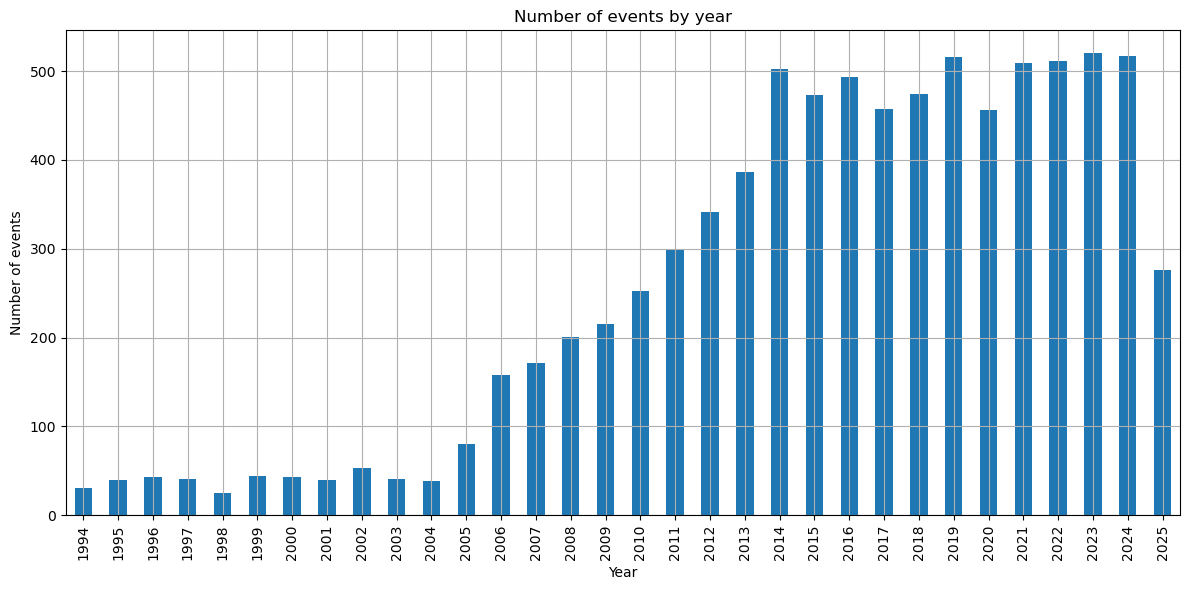

In [43]:
events_by_year.plot(kind="bar", figsize=(12, 6), title="Number of events by year")
plt.xlabel("Year")
plt.ylabel("Number of events")
plt.grid(True)
plt.tight_layout()
plt.show()

> We can see from the chart that the number of events in the year increased significantly from 2005 onwards

### Top 5 Cities and Countries with more events

In [44]:
event_location = raw_event_details["location"].copy()

split_location = event_location.str.split(',', expand=True).apply(lambda col: col.str.strip())

# Creating new data frame
event_location_df = pd.DataFrame()
event_location_df["city"] = split_location[0]
event_location_df["country"] = split_location.apply(
    lambda row: row.iloc[-2] if pd.isna(row.iloc[-1]) else row.iloc[-1],
    axis=1
)

In [45]:
cities_num_of_events = event_location_df["city"].value_counts().sort_values(ascending=False)
cities_num_of_events.head(5)

city
Las Vegas         2787
Abu Dhabi          240
London             183
Rio de Janeiro     147
Newark             127
Name: count, dtype: int64

In [46]:
cities_num_of_events = event_location_df["country"].value_counts().sort_values(ascending=False)
cities_num_of_events.head(5)

country
USA                     5764
Brazil                   471
Canada                   413
United Kingdom           338
United Arab Emirates     240
Name: count, dtype: int64

### Number of fights by weight category over time

In [47]:
categories_fights = pd.merge(
    raw_fight_details[["event_id", "division"]],
    raw_event_details[["event_id", "date"]],
    on="event_id",
    how="inner"
).drop(["event_id"], axis = 1)

In [48]:
categories_fights["year"] = pd.to_datetime(categories_fights["date"]).dt.year

In [49]:
categories_fights = categories_fights.drop(["date"], axis = 1)

In [50]:
fights_per_year_division = (
    categories_fights
    .groupby(["year", "division"])
    .size()
    .reset_index(name="num_fights")
)

In [51]:
fights_per_year_division

,year,division,num_fights
0,1994,2 tournament,15
1,1994,3 tournament,6
2,1994,4 tournament,10
3,1994,open weight,330
4,1995,5 tournament,10
...,...,...,...
352,2025,welterweight,357
353,2025,women's bantamweight,125
354,2025,women's featherweight,9
355,2025,women's flyweight,182


> Only weight categories with short names (up to two words) and divisions with no numbers in the name were considered, as long names suggest personalized, inconsistent, or poorly categorized divisions in the raw data.

In [52]:
filtered_fights = fights_per_year_division[
    (fights_per_year_division["division"].str.split().str.len() <= 2) &
    (~fights_per_year_division["division"].str.contains(r'\d', regex=True))
]

In [53]:
filtered_fights

,year,division,num_fights
3,1994,open weight,330
7,1995,open weight,331
8,1995,superfight championship,31
12,1996,open weight,331
13,1996,superfight championship,16
...,...,...,...
352,2025,welterweight,357
353,2025,women's bantamweight,125
354,2025,women's featherweight,9
355,2025,women's flyweight,182


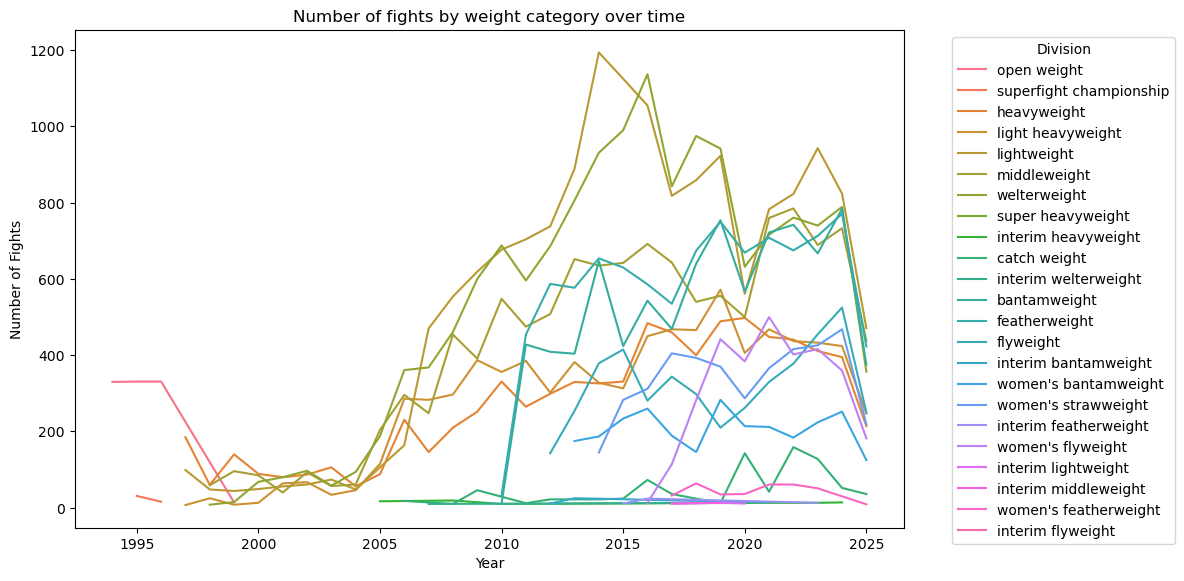

In [54]:


plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_fights, x="year", y="num_fights", hue="division")
plt.title("Number of fights by weight category over time")
plt.xlabel("Year")
plt.ylabel("Number of Fights")
plt.legend(title="Division", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [55]:
(filtered_fights["division"] == "superfight championship").value_counts()

division
False    274
True       2
Name: count, dtype: int64

In [56]:
(filtered_fights["division"] == "open weight").value_counts()

division
False    272
True       4
Name: count, dtype: int64

As we just have a few registers for open weight and superfight championship, those values will be discarted from the graph as we'll have no gain with this

In [57]:
old_categories_disclaimer = "Superfight Championship and Open Weight were categories disputed only in, respectively 2 and 4 years"

In [58]:
filtered_fights = filtered_fights[
    (filtered_fights["division"].str.split().str.len() <= 2) &
    (~filtered_fights["division"].str.contains(r'open weight|superfight championship', regex=True))
]

In [59]:
filtered_fights

,year,division,num_fights
20,1997,heavyweight,185
21,1997,light heavyweight,7
22,1997,lightweight,99
25,1998,heavyweight,60
26,1998,light heavyweight,25
...,...,...,...
352,2025,welterweight,357
353,2025,women's bantamweight,125
354,2025,women's featherweight,9
355,2025,women's flyweight,182


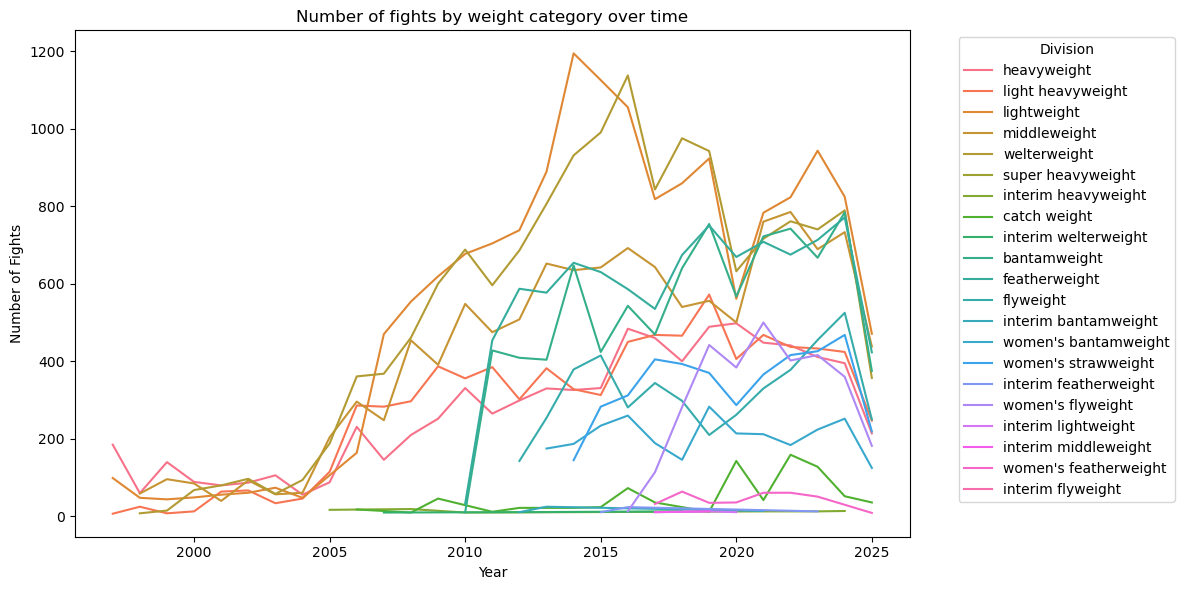

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_fights, x="year", y="num_fights", hue="division")
plt.title("Number of fights by weight category over time")
plt.xlabel("Year")
plt.ylabel("Number of Fights")
plt.legend(title="Division", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## General fight statistics

### Ratio of wins by knockout, submission, and decision

In [74]:
methods = raw_fight_details["method"]
methods.value_counts()

method
Decision - Unanimous       2955
KO/TKO                     2589
Submission                 1607
Decision - Split            794
TKO - Doctor's Stoppage      98
Decision - Majority          95
Overturned                   57
Could Not Continue           30
DQ                           23
Other                         2
Name: count, dtype: int64

In [93]:
ko_submission_decision_methods = raw_fight_details[
    raw_fight_details["method"].str.contains("KO/TKO|Submission|Decision", na=False)
]

In [95]:
ko_submission_decision_methods["method"]

0                 Submission
1       Decision - Unanimous
2                     KO/TKO
3       Decision - Unanimous
4       Decision - Unanimous
                ...         
8245              Submission
8246                  KO/TKO
8247                  KO/TKO
8248              Submission
8249                  KO/TKO
Name: method, Length: 8040, dtype: object